# Classification avec un neurone - Descente de gradient

Nous souhaitons pouvoir dire pour chaque point d'un plan s’il devrait être colorié en rouge ou bien en bleu à partir d'informations issues d'un jeu de données initial. Pour cela on décide de construire le réseau le plus simple possible : avec un seul neurone. Cela correspond donc à séparer les points du plan selon une droite. La dimension de
l’entrée est 2, les coordonnées (x, y) de chaque point du jeux initial, et celle la sortie est 1, point rouge ou bleu. Nous utiliserons la fonction d'activation sigmoide. Il y faut déterminer les paramètres, correspondant aux poids et au biais, qui permettent de trouver cette droite.

## Apprentissage
Pour trouver les paramètres du neurone qui définissent la meilleure fonction F permettant la classification des données, il s’agit de minimiser l’erreur E (comme vu en cours). Pour cela on utilise la méthode de la descente de gradient. Pour cela il vous faudra trouver puis implémenter les équations associées. 

Nous allons utiliser python et les packages de base ci-dessous.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nous allons maintenant définir les différentes fonctions qui nous permettront de résoudre notre problème.

### Fonction d'activation
Définir la fonction sigmoïde

In [8]:
def sigmoide(x):
  return 1/(1+np.exp(-x))

### Fonction d'erreur
Déterminer l’erreur locale pour la donnée numéro $i$ et l'erreur globale. Construire la fonction associée. Los rojos son clasificados como 1 y los azules como 0

In [9]:
def E(w1, w2, b):
  somme_rouges = sum([ (sigmoide(w1*x1+w2*x2+b) - 1)**2 for x1, x2 in carres_rouges ])
  somme_bleus = sum([ (sigmoide(w1*x1+w2*x2+b) - 1)**2 for x1, x2 in ronds_bleus ])
  return (somme_rouges + somme_bleus)/N

#Otra forma de código
'''
def E(w1, w2, b):
  for i in range(len(carres_rouges)):
    somme_rouges += (sigmoide(w1*carres_rouges[i,0]+w2*carres_rouges[i,1]+b) - 1)**2 
  for i in range(len(ronds_bleus)):
    somme_bleus += (sigmoide(w1*ronds_bleus[i,0]+w2*ronds_bleus[i,1]+b) - 1)**2 
  
  return (somme_rouges + somme_bleus)/N
'''

'\ndef E(w1, w2, b):\n  for i in range(len(carres_rouges)):\n    somme_rouges += (sigmoide(w1*carres_rouges[i,0]+w2*carres_rouges[i,1]+b) - 1)**2 \n  for i in range(len(ronds_bleus)):\n    somme_bleus += (sigmoide(w1*ronds_bleus[i,0]+w2*ronds_bleus[i,1]+b) - 1)**2 \n  \n  return (somme_rouges + somme_bleus)/N\n'

### Calcul des gradients
Déterminer les expressions des différents gradients et construire les fonctions associées.

In [10]:
def calcul_grad(w1, w2, b, y, data):
  gw1 = 1/N * sum([ 2*x1*sigmoide(w1*x1+w2*x2+b)*(1-sigmoide(w1*x1+w2*x2+b))*(sigmoide(w1*x1+w2*x2+b)-y)  for x1, x2 in data ])
  gw2 = 1/N * sum([ 2*x2*sigmoide(w1*x1+w2*x2+b)*(1-sigmoide(w1*x1+w2*x2+b))*(sigmoide(w1*x1+w2*x2+b)-y)  for x1, x2 in data ])
  gb = 1/N * sum([ 2*sigmoide(w1*x1+w2*x2+b)*(1-sigmoide(w1*x1+w2*x2+b))*(sigmoide(w1*x1+w2*x2+b)-y)  for x1, x2 in data ])

  return gw1, gw2, gb

#Otra forma de código
'''
def calcul_grad(w1, w2, b, y, data):
  for i in range(len(carres_rouges)):
    sigm_i=sigmoide(w1*data[i][0]+w2*data[i][1]+b)
    gw1 += 2*data[i][0]*sigm_i*(1-sigm_i)*(sigm_i-y) 
    gw2 += 2*data[i][1]*sigm_i*(1-sigm_i)*(sigm_i-y) 
    gb += 2*sigm_i*(1-sigm_i)*(sigm_i-y) 
  gw1/=N
  gw2/=N
  gb/=N

  return gw1, gw2, gb
'''

'\ndef calcul_grad(w1, w2, b, y, data):\n  for i in range(len(carres_rouges)):\n    sigm_i=sigmoide(w1*data[i][0]+w2*data[i][1]+b)\n    gw1 += 2*data[i][0]*sigm_i*(1-sigm_i)*(sigm_i-y) \n    gw2 += 2*data[i][1]*sigm_i*(1-sigm_i)*(sigm_i-y) \n    gb += 2*sigm_i*(1-sigm_i)*(sigm_i-y) \n  gw1/=N\n  gw2/=N\n  gb/=N\n\n  return gw1, gw2, gb\n'

In [11]:
def grad_E(w1, w2, b):
  gw1_red, gw2_red, gb_red = calcul_grad(w1, w2, b, 1, carres_rouges)
  gw1_blu, gw2_blu, gb_blu = calcul_grad(w1, w2, b, 0, ronds_bleus)
  
  return np.array([gw1_red+gw1_blu, gw2_red+gw2_blu, gb_red+gb_blu])

### Algorithme de descente de gradient
Construire l'algorithme de descente de gradient qui fera appel aux fonctions précédentes.

In [18]:
def descente(theta0, delta=0.1, nmax=10):
    liste_theta = [theta0] # sauvegarde valeurs successive de X
    liste_grad = [] # sauvegarde valeurs successives du gradient
    theta = theta0
    for i in range(nmax):
      gradient = grad_E(theta[0],theta[1],theta[2])
      theta = theta - gradient*delta
      liste_theta.append(theta)
      liste_grad.append(gradient)
   
    return liste_theta, liste_grad

### Fonctions d'affichage des résultats

In [13]:
def affiche_descente(f, liste_theta, liste_grad, delta, nmax=10):
    print("vittesse d'apprentissage : ",delta)
    print("Nombre d'itérations :", nmax)
    print("Paramètres initiaux :", theta0)
    for i in range(len(liste_theta)-1):
        print("--- Etape",i)
        print("Paramètres :", *liste_theta[i])
        print("Gradient ", *liste_grad[i])
        print("Valeur de la fonction coût ", f(*liste_theta[i]))
    print("--- --------------------")
    print("Dernier point :", *liste_theta[-1])
    print("Dernière valeur de la fonction coût ", f(*liste_theta[-1]))
    print("--- --------------------")
    return


In [14]:
def graphique_points(w1, w2, b):
    for x, y in carres_rouges:    
        plt.scatter(x, y, marker='s', color='red')
    for x, y in ronds_bleus:   
        plt.scatter(x, y, color='blue')

    VX = np.linspace(-0.5, 5.5, 100)
    VY = -1/w2*(w1*VX+b)

    #  affichage
    plt.plot(VX, VY, color='black')
    plt.axis('equal')
    plt.xlim(-0.5,5.5)
    plt.ylim(-0.5,5.5)
    plt.tight_layout()
    plt.show()
    return


### Mise en oeuvre
Vous pouvez maintenant tester votre solution à partir de l'exemple ci-dessous

Coefficients w1, w2, b du neurone et de la droite de séparation : 1.75294 -3.25592 2.96609


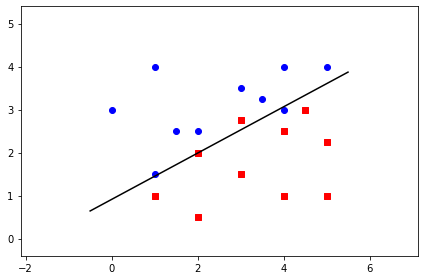

In [24]:
# Génération des données initiales : carré rouge / rond bleu 
carres_rouges = [(1,1), (2,0.5), (2,2), (3,1.5), (3,2.75), (4,1), (4,2.5), (4.5,3), (5,1), (5,2.25)]
ronds_bleus   = [(0,3), (1,1.5), (1,4), (1.5,2.5), (2,2.5), (3,3.5), (3.5,3.25), (4,3), (4,4), (5,4)] 

N = len(carres_rouges) + len(ronds_bleus)    # taille des données
 
# initialisation des paramètres du neurone
theta0 = np.array([0, 1, -2])

# recherche des paramètres du neurone
mon_delta = 1
mon_nmax = 500
liste_theta, liste_grad = descente(theta0, delta=mon_delta, nmax=mon_nmax)

#affiche_descente(E, liste_theta, liste_grad, delta=mon_delta, nmax=mon_nmax)

w1, w2, b = liste_theta[-1]
print("Coefficients w1, w2, b du neurone et de la droite de séparation :", round(w1,5), round(w2,5), round(b,5))

graphique_points(w1, w2, b)

### Commenter les résultats



## Prédiction
Vous avez obtenu par la descente de gradient les paramètres du neurone qui permettent de séparer le plan en deux parties. Il est maintenat possible de l'utiliser pour prédire à quelle classe appartient n'importe quel point de l'espace.

Prédire par exemple, la classe des points de coordonnées (x1=2, x2=3) et de (x1=2, x2=1).


In [21]:
def graphique_new_points(x_new, y_new, new_label, w1, w2, b):
    for x, y in carres_rouges:    # points
        plt.scatter(x, y, marker='s', color='red')
    for x, y in ronds_bleus:    # points
        plt.scatter(x, y, color='blue')

    VX = np.linspace(-0.5, 5.5, 100)
    VY = -1/w2*(w1*VX+b)

    #  affichage données initiales et courbe
    plt.plot(VX, VY, color='black')
    plt.axis('equal')
    plt.xlim(-0.5,5.5)
    plt.ylim(-0.5,5.5)
    plt.tight_layout()
    
    if new_label==0:
        plt.scatter(x_new, y_new, marker='X', color='blue')
    else:
        plt.scatter(x_new, y_new, marker='X', color='red')    
    
    
    # plt.savefig('retro_01_e.png')
    plt.show()
    return

In [23]:
def predict(w1,w2,b,x1,x2):
    F=sigmoide(w1*x1+w2*x2+b)
    if F > 0.5:
        print('rouge', F)
        graphique_new_points(x1,x2, 1, w1, w2, b)
    else:
        print('bleu', F)
        graphique_new_points(x1,x2, 0, w1, w2, b)
    return

predict((1,2))
predict()


TypeError: ignored

### Commenter les résultats

